<a href="https://colab.research.google.com/github/zealpatel1990/KDM_spring_2021_class/blob/main/ICP%201/ICP_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
# import all the libraries 
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
import pandas as pd
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Next we will mount our google drive on the colab 
run the code below and follow the instructions the G drive will be mounted on drive -> MyDrive

Readind the files as a pandas dataframe 

In [10]:
# i try to avoid mount drive just out of security concern
# also as data is uploaded to github using directly that link
dataset=pd.read_csv("https://raw.githubusercontent.com/zealpatel1990/KDM_spring_2021_class/main/ICP%201/input_file.txt",delimiter="\t")
dataset

,"Text Analytics has lots of applications in today's online world. By analyzing tweets on Twitter, we can find trending news and peoples reaction on a particular event. Amazon can understand user feedback or review on the specific product. BookMyShow can discover people's opinion about the movie. Youtube can also analyze and understand peoples viewpoints on a video."


converting the data frame to text

In [4]:
text= dataset.to_string()
text

"Empty DataFrame\nColumns: [Text Analytics has lots of applications in today's online world. By analyzing tweets on Twitter, we can find trending news and peoples reaction on a particular event. Amazon can understand user feedback or review on the specific product. BookMyShow can discover people's opinion about the movie. Youtube can also analyze and understand peoples viewpoints on a video.]\nIndex: []"

Breaking the text into sentences 

In [5]:
tokenized_text = sent_tokenize(text)
print(tokenized_text)

["Empty DataFrame\nColumns: [Text Analytics has lots of applications in today's online world.", 'By analyzing tweets on Twitter, we can find trending news and peoples reaction on a particular event.', 'Amazon can understand user feedback or review on the specific product.', "BookMyShow can discover people's opinion about the movie.", 'Youtube can also analyze and understand peoples viewpoints on a video.]', 'Index: []']


Breaking the text into words 

In [6]:
tokenized_word=word_tokenize(text)
print(tokenized_word)
print(len(tokenized_word))

['Empty', 'DataFrame', 'Columns', ':', '[', 'Text', 'Analytics', 'has', 'lots', 'of', 'applications', 'in', 'today', "'s", 'online', 'world', '.', 'By', 'analyzing', 'tweets', 'on', 'Twitter', ',', 'we', 'can', 'find', 'trending', 'news', 'and', 'peoples', 'reaction', 'on', 'a', 'particular', 'event', '.', 'Amazon', 'can', 'understand', 'user', 'feedback', 'or', 'review', 'on', 'the', 'specific', 'product', '.', 'BookMyShow', 'can', 'discover', 'people', "'s", 'opinion', 'about', 'the', 'movie', '.', 'Youtube', 'can', 'also', 'analyze', 'and', 'understand', 'peoples', 'viewpoints', 'on', 'a', 'video', '.', ']', 'Index', ':', '[', ']']
75


finding the frequencies distribution

In [38]:
fdist = FreqDist(tokenized_word)
print(fdist)

<FreqDist with 56 samples and 75 outcomes>


Finding the two most common words  

In [8]:
fdist.most_common(2)

[('.', 5), ('on', 4)]

Plot of the frequencies distribution

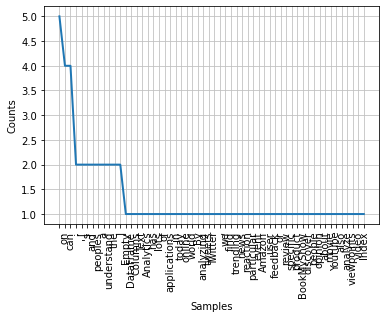

In [9]:
v=fdist.plot(75,cumulative=False)
plt.show()

POS Tagging Words

In [14]:
tagged = nltk.pos_tag(tokenized_word)
tagged[1:10]

[('DataFrame', 'NNP'),
 ('Columns', 'NNP'),
 (':', ':'),
 ('[', 'JJ'),
 ('Text', 'NNP'),
 ('Analytics', 'NNP'),
 ('has', 'VBZ'),
 ('lots', 'NNS'),
 ('of', 'IN')]

Tabulate shows frequency distribution in table

In [20]:
fdist = FreqDist(tokenized_word)
fdist.tabulate()

           .           on          can            :            [           's          and      peoples            a   understand          the            ]        Empty    DataFrame      Columns         Text    Analytics          has         lots           of applications           in        today       online        world           By    analyzing       tweets      Twitter            ,           we         find     trending         news     reaction   particular        event       Amazon         user     feedback           or       review     specific      product   BookMyShow     discover       people      opinion        about        movie      Youtube         also      analyze   viewpoints        video        Index 
           5            4            4            2            2            2            2            2            2            2            2            2            1            1            1            1            1            1            1            1            

Freq distributions of nouns, verbs, conjuctures and many more

{',': 1,
 '.': 5,
 ':': 2,
 'CC': 3,
 'DT': 4,
 'IN': 8,
 'JJ': 7,
 'MD': 4,
 'NN': 15,
 'NNP': 8,
 'NNS': 7,
 'POS': 2,
 'PRP': 1,
 'RB': 1,
 'VB': 5,
 'VBG': 1,
 'VBZ': 1}

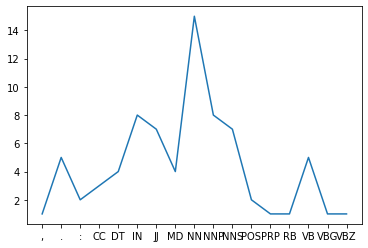

In [45]:
pos_freq_dist={}
for i in tagged:
  if i[1] not in pos_freq_dist.keys():
    pos_freq_dist[i[1]]=1
  else: 
    pos_freq_dist[i[1]]+=1


plt.plot(*zip(*sorted(pos_freq_dist.items())))
plt.show()

pos_freq_dist